<a href="https://colab.research.google.com/github/Kusvihawan/Regresi/blob/master/Multi_Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi Linear Regression**

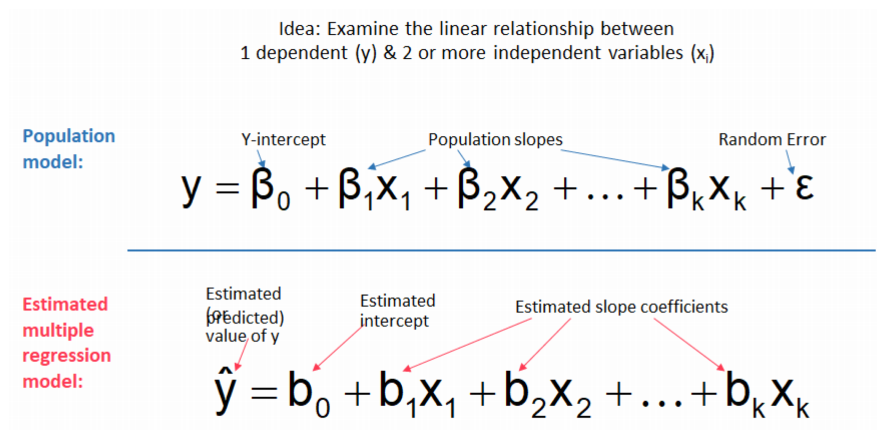




Regresi Multi Linear merupakan teknik dalam mengolah hubungan dari beberapa variabel untuk memprediksi keluaran dari hubungan tersebut. Ide utama dalam regresi multi linear adalah membandingkan suatu variabel tak bebas dengan 2 atau lebih variabel bebas.Dalam memproses regresi maka perlu adanya persiapan data terlebih dahulu.

In [17]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')

In [ ]:
#Import data
df_sale = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv',index_col='week', sep =";")

df_sale

,pie_sales,price,advertising
week,,,
1,350,5.5,3.3
2,460,7.5,3.3
3,350,8.0,3.0
4,430,8.0,4.5
5,350,6.8,3.0
6,380,7.5,4.0
7,430,4.5,3.0
8,470,6.4,3.7
9,450,7.0,3.5


# Membuat histogram sebagai gambaran hubungan antar variabel secara sederhana

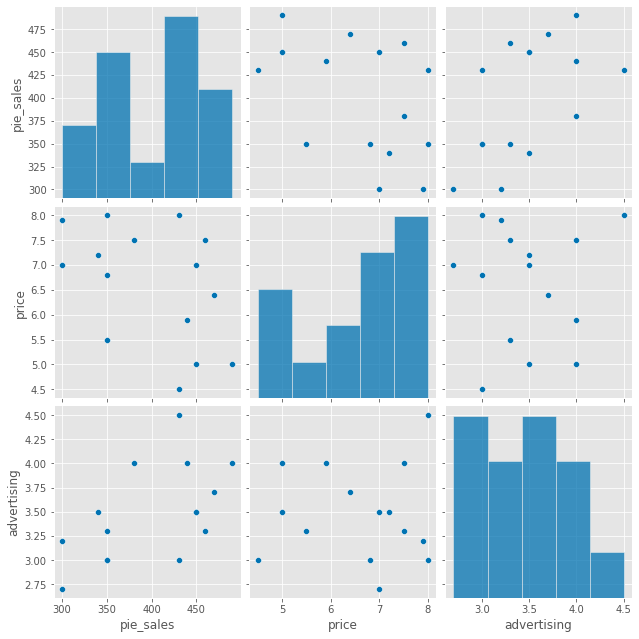

In [ ]:
sns.set_palette('colorblind')
sns.pairplot(data=df_sale, height=3)

# Regresi Menggunakan sklearn

In [ ]:
#Set variabel bebas dan tak bebas
X = df_sale[['price', 'advertising']].values.reshape(-1,2)
Y = df_sale['pie_sales']
x = X[:, 0]
y = X[:, 1]
z = Y

# Inisialisasi model menggunakan sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


In [ ]:
# Membuat prediksi sesuai model syang sudah di buat
x_pred = np.linspace(0, 10, 30)   
y_pred = np.linspace(0, 10, 30) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
predicted = regr.predict(model_viz)
r2 = regr.score(X, Y)

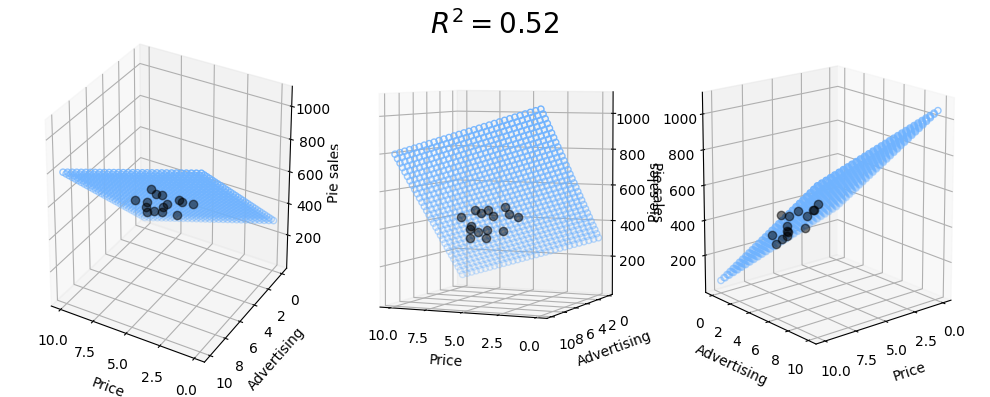

In [ ]:
#Visualisasi data dengan grafik 3D
plt.style.use('default')

fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3ff')
    ax.set_xlabel('Price', fontsize=10)
    ax.set_ylabel('Advertising', fontsize=10)
    ax.set_zlabel('Pie sales', fontsize=10)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=15, azim=50)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()


# Validasi Model 

In [ ]:
X = df_sale[['price', 'advertising']]
X = sm.add_constant(X) # adding a constant

In [ ]:
model = sm.OLS(Y, X).fit()
 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Thu, 22 Oct 2020   Prob (F-statistic):             0.0120
Time:                        15:49:27   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

Validasi model dapat dilakukan dengan mencari $R^2$ yang mana merupakan nilai porsi variabel tak bebas atau terikat yang dapat diprediksi dari variabel bebas dengan formula atau rumus sebagai berikut:

  <div align="center"> $R^2 = \frac{\sum(\hat{Y_i}-\bar{Y})^2}{\sum(Y_i-\bar{Y})^2}$ </div>

  dari tabel OLS diatas nilainya dapat dilihat pada atribut R-squared

# F-Test 

Satu konteks umum dalam F-Test ini adalah memutuskan apakah suatu model cocok dengan data secara signifikan lebih baik daripada model sederhana, misalnya model dengan hanya satu variabel independen.

Pada dasarnya F-Test digunakan untuk melihat distribusi F yang memiliki atribut F-Statistic dan probabilitas F-Statistic

In [ ]:
print('F-statistic:', model.fvalue)
print('Peluang untuk mendapatkan nilai setinggi F-statistic:', model.f_pvalue)

F-statistic: 6.538606789020464
Peluang untuk mendapatkan nilai setinggi F-statistic: 0.01200637223318641


# T-Test

T-Test merupakan teknik yang paling umum diterapkan ketika statistik uji akan mengikuti distribusi normal jika nilai istilah penskalaan dalam statistik uji diketahui. Dalam uji ini kita akan mencoba mendapatkan pvalue yang merupakan hasil pengujian yang setidaknya sama dengan hasil yang sebenarnya diamati

In [ ]:
print(model.pvalues)

const          0.019932
price          0.039788
advertising    0.014494
dtype: float64
